In [17]:
from Utils.model_builder.tf_models.model_02 import pix2pix 
import tensorflow as tf
module_name = "pix2pix"
from Utils.mlflow.mlflow import mlflow_track
from Utils.data_loader.load_images import load_x_y_images, load_x_images, load_test_image
import mlflow
from Utils.visualize_images.visualize_images import display_one_image
from Utils.config import load_config_file
import matplotlib.pyplot as plt


In [2]:

config_file = load_config_file()

In [3]:
track_uri = config_file["mlflow"]["track_uri"]
data_version = config_file["data_versions"][-1] # -1 to get the latest only without having to hardcode it in here,
                                                # "Assuming that the last will always will be the updated one"
epochs = config_file["train_config"]["epochs"]
batch_size = config_file["train_config"]["batch_size"]
print(data_version)

3-10-22


In [4]:
metric = f"val_{config_file['train_config']['metric']}"
reduce_lr_pt = config_file["train_config"]["lr_reduce_pati"]
erl_stp_pt = config_file["train_config"]["earl_stop"]

Mlflow causing the training to be a lot slower, and my limited device can't handle it

In [6]:
'''mlflow.set_experiment("X_Y_images")'''

'mlflow.set_experiment("X_Y_images")'

In [7]:
dataset = load_x_y_images(data_version,scale=True).shuffle(1000)

<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None))>


2022-10-23 17:31:08.417232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:31:08.426057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:31:08.426297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:31:08.426910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

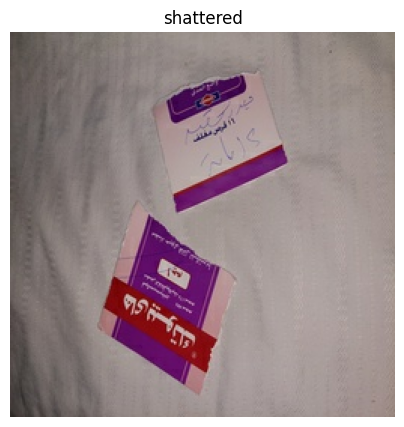

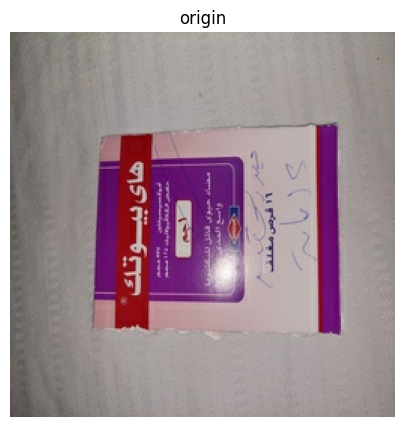

In [8]:
from Utils.data_loader.load_images import scale_pic 
sample = dataset.take(1)#.map(scale_pic) #If not scaled, matplotlib will clip it and ruin the pic
for x ,y in sample:
    display_one_image(x,"shattered")
    display_one_image(y,"origin")

In [9]:
dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [10]:
lr = config_file["train_config"]["learning_rate"]
model = pix2pix(learning_rate=lr)

Mlflow causing the training to be a lot slower, and my limited device can't handle it

Restored checkpoints


/home/akm/Combiner-GANS/lib/python3.8/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-10-23 17:31:25.179300: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-10-23 17:31:25.698491: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-23 17:31:25.699792: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-10-23 17:31:27.322140: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bf

Epoch: 0
Step: 0, Discriminator loss: 0.0005879917298443615, Generator loss: 15.348001480102539
Epoch: 0
Step: 10, Discriminator loss: 0.0020740521140396595, Generator loss: 13.185386657714844
Epoch: 0
Step: 20, Discriminator loss: 0.0018655225867405534, Generator loss: 15.327241897583008
Epoch: 0
Step: 30, Discriminator loss: 0.000546744093298912, Generator loss: 14.17888355255127
Epoch: 0
Step: 40, Discriminator loss: 0.0007097815396264195, Generator loss: 14.56863784790039
Epoch: 0
Step: 50, Discriminator loss: 0.00044302485184744, Generator loss: 15.052812576293945
Epoch: 0
Step: 60, Discriminator loss: 0.0011999537236988544, Generator loss: 15.337738037109375


2022-10-23 17:34:01.980320: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-23 17:34:02.005980: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


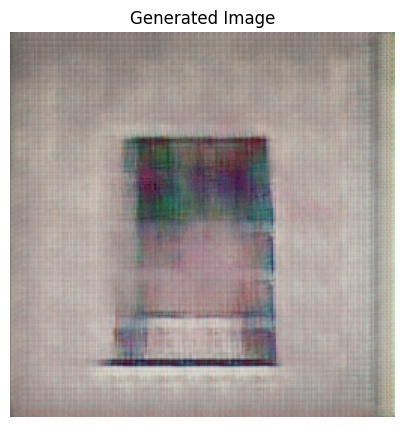

In [11]:
test_image = load_test_image("Data/3-10-22/test/1.jpeg",(256,256))
history = model.fit(dataset,epochs=1,test_image=test_image,load_check_point=True,
            load_path="1666477048.450107_300_checkpoints/training_checkpoints",save_models=False)

In [43]:
def plot_test_images(model,test_images,seen_image=False):
    images = [model.predict(image) for image in test_images]
    titles = []
    for title in range(len(images)):
        titles.append("Test Image")
        titles.append("Predicted Test Image")


    total_num_of_images = len(test_images)*2

    if not isinstance(seen_image,bool):
        seen_image_pred = model.predict(seen_image)
        total_num_of_images+=2

    
    plot_size = total_num_of_images
    plt.figure(figsize=(15, 15))
    i = 0
    for test_img,pred_image in zip(test_images,images):
        test_img = tf.squeeze(test_img)
        pred_image = tf.squeeze(pred_image)
        plt.subplot(1, plot_size, i+1)
        plt.title(titles[i])
        plt.imshow(test_img)
        plt.axis('off')
        i+=1
        plt.subplot(1, plot_size, i+1)
        plt.title(titles[i])
        plt.imshow(pred_image)
        plt.axis('off')
        i+=1

    if not isinstance(seen_image,bool):
        seen_image = tf.squeeze(seen_image)
        seen_image_pred = tf.squeeze(seen_image_pred)
        plt.subplot(1, plot_size, i+1)
        plt.title("Seen During Training")
        plt.imshow(seen_image)
        plt.axis('off')
        i+=1
        plt.subplot(1, plot_size, i+1)
        plt.title("Predicted Seen Image")
        plt.imshow(seen_image_pred)
        plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 23ms/step


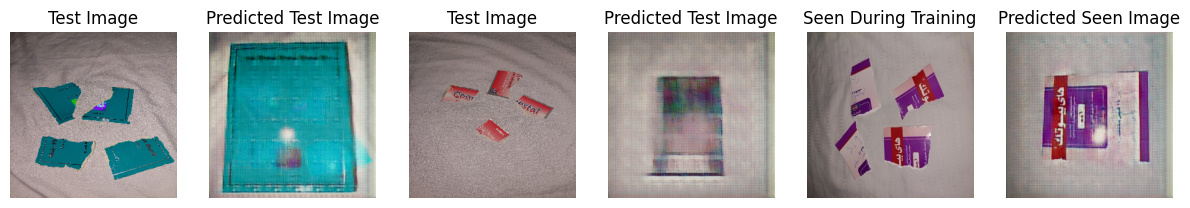

In [44]:
test_images = []
test_images.append(load_test_image("Data/4-09-22/test/WhatsApp Image 2022-09-24 at 4.44.56 PM (1).jpeg",(256,256)))
test_images.append(load_test_image("Data/3-10-22/test/1.jpeg",(256,256)))
test_images.append(load_test_image("Data/3-10-22/test/1.jpeg",(256,256)))

seen_test_image = load_test_image("Data/3-10-22/9/20221019_223032.jpg",(256,256))

plot_test_images(model.get_generator(),test_images,seen_test_image)

In [ ]:
@mlflow_track
def exp_x_y_images(model,dataset=dataset,data_version=data_version):
    """I would like to try generating the same images so that the model can learn the feature of our dataset,
    then leverage this learning with our task"""
    mlflow.tensorflow.autolog()
    mlflow.log_param("Data Version", data_version)
    mlflow.log_param("Epochs", epochs)
    mlflow.log_param("reduce_lr", reduce_lr_pt)
    mlflow.log_param("earl_st",erl_stp_pt)

    lr = config_file["train_config"]["learning_rate"]
    loss = config_file["train_config"]["loss"]

    model = pix2pix(learning_rate=lr)
    mlflow.log_param("Model Module", f"{module_name},lyr_freezed_-1")
    model.fit(dataset,epochs=epochs,test_image=test_image)
    #mse = model.evalute(dataset)
    #mlflow.log_metric("mse", mse)
    #return model

In [18]:
'''exp_x_y_images(model)'''

'exp_x_y_images(model)'